In [1]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../../Datos-Fuentes/Fuentes/'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../../Datos-Fuentes/Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

### Veo datos


In [8]:
import pandas as pd
import chardet

nombre_archivo = DATOS_DIR + 'Drug5.csv'

with open(nombre_archivo, 'rb') as  f:
    result = chardet.detect(f.read())

df = pd.read_csv(nombre_archivo, encoding=result["encoding"])
display(df)
df.info()
df.nunique()

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY
1,47,M,LOW,HIGH,0.739309,0.056468,drugC
2,47,M,LOW,HIGH,0.697269,0.068944,drugC
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX
4,61,F,LOW,HIGH,0.559294,0.030998,drugY
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,0.848774,0.073380,drugC
196,16,M,LOW,HIGH,0.743021,0.061886,drugC
197,52,M,NORMAL,HIGH,0.549945,0.055581,drugX
198,23,M,NORMAL,NORMAL,0.784520,0.055959,drugX


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na           200 non-null    float64
 5   K            200 non-null    float64
 6   Drug         200 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ KB


Age             57
Sex              2
BP               3
Cholesterol      2
Na             200
K              200
Drug             5
dtype: int64

### **Mapeo**

In [16]:
mapeo = {
    'Sex': {'F': 0.0, 'M':1.0},
    'BP': {'LOW':0.0, 'NORMAL':0.5, 'HIGH':1.0},
    'Cholesterol': {'NORMAL':0.5, 'HIGH':1.0},
    'Drug': {'drugA':0.0, 'drugB':0.0, 'drugC':0.0, 'drugX':0.0, 'drugY':1.0}
}

df.replace(mapeo, inplace=True)
display(df)

,Age,Sex,BP,Cholesterol,Na,K,Drug
0,23,0.0,1.0,1.0,0.792535,0.031258,1.0
1,47,1.0,0.0,1.0,0.739309,0.056468,0.0
2,47,1.0,0.0,1.0,0.697269,0.068944,0.0
3,28,0.0,0.5,1.0,0.563682,0.072289,0.0
4,61,0.0,0.0,1.0,0.559294,0.030998,1.0
...,...,...,...,...,...,...,...
195,56,0.0,0.0,1.0,0.848774,0.073380,0.0
196,16,1.0,0.0,1.0,0.743021,0.061886,0.0
197,52,1.0,0.5,1.0,0.549945,0.055581,0.0
198,23,1.0,0.5,0.5,0.784520,0.055959,0.0


### **Normalizo**

In [19]:
from sklearn import model_selection, preprocessing
import numpy as np

X = np.array(df.iloc[:,:-1])
T = np.array(df['Drug'])

nColumn = ['Otra', 'drugY']

display(X)
display(T)

#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split(
        X, T, test_size=0.30, random_state=42)

normalizador = preprocessing.MinMaxScaler()

X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)

display(X_train)

array([[2.30000e+01, 0.00000e+00, 1.00000e+00, 1.00000e+00, 7.92535e-01,
        3.12580e-02],
       [4.70000e+01, 1.00000e+00, 0.00000e+00, 1.00000e+00, 7.39309e-01,
        5.64680e-02],
       [4.70000e+01, 1.00000e+00, 0.00000e+00, 1.00000e+00, 6.97269e-01,
        6.89440e-02],
       ...,
       [5.20000e+01, 1.00000e+00, 5.00000e-01, 1.00000e+00, 5.49945e-01,
        5.55810e-02],
       [2.30000e+01, 1.00000e+00, 5.00000e-01, 5.00000e-01, 7.84520e-01,
        5.59590e-02],
       [4.00000e+01, 0.00000e+00, 0.00000e+00, 5.00000e-01, 6.83503e-01,
        6.02260e-02]])

array([1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.])

array([[0.08474576, 0.        , 1.        , 1.        , 0.978102  ,
        0.99816589],
       [0.69491525, 0.        , 1.        , 1.        , 0.63183456,
        0.16216629],
       [1.        , 1.        , 1.        , 1.        , 0.54143872,
        0.92981115],
       [0.47457627, 1.        , 0.        , 1.        , 0.31608982,
        0.3519462 ],
       [0.52542373, 1.        , 0.5       , 0.        , 0.06158335,
        0.88669248],
       [0.77966102, 0.        , 1.        , 1.        , 0.32809947,
        0.08080293],
       [0.59322034, 1.        , 0.5       , 0.        , 0.62384928,
        0.46426873],
       [0.83050847, 1.        , 1.        , 0.        , 0.60380107,
        0.26029142],
       [0.79661017, 1.        , 0.5       , 1.        , 0.64429586,
        0.43354731],
       [0.6779661 , 0.        , 1.        , 1.        , 0.34325044,
        0.64588004],
       [0.88135593, 1.        , 0.5       , 0.        , 0.87524994,
        0.97970586],
       [0.33898305, 1

### **Entreno perceptron**

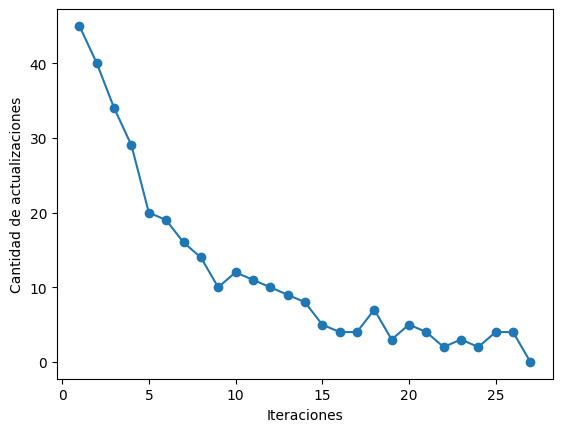

In [27]:
from ClassPerceptron import Perceptron
import matplotlib.pyplot as plt 

ppn = Perceptron(alpha=0.01, n_iter=650, random_state=None)
ppn.fit(X_train, T_train)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

### **Verifico que se haya entrenado correctamente**

In [29]:
Y_test = ppn.predict(X_test)

aciertos = sum(Y_test == T_test)
print("aciertos = ", aciertos)

print("%% de aciertos = %.2f %%" % (100*aciertos/X_test.shape[0]))

aciertos =  60
% de aciertos = 100.00 %
